In [20]:
#import necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer # for preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder # for scaling and encoding
from sklearn.model_selection import train_test_split # for splitting data

In [21]:
#load the cleaned data
df_cleaned = pd.read_csv("../data/cleaned_data.csv")

In [22]:
#display the first few rows of the dataframe
df_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,683.0,Germany,Male,49.0,7.0,123837.86,2.0,1.0,1.0,138700.75,1
1,608.0,France,Female,30.0,10.0,0.00,2.0,1.0,1.0,146723.72,0
2,539.0,France,Female,32.0,8.0,0.00,1.0,1.0,1.0,94873.60,0
3,530.0,Spain,Female,39.0,8.0,0.00,2.0,0.0,0.0,177896.93,0
4,613.0,France,Female,45.0,10.0,0.00,2.0,1.0,1.0,116748.14,0


In [23]:
#display the shape of the dataframe
df_cleaned.shape

(15000, 11)

In [24]:
#separate numerical and categorical variables
num_var = df_cleaned.select_dtypes(include=['int64', 'float64'])
cat_var = df_cleaned.select_dtypes(include=['object','category'])

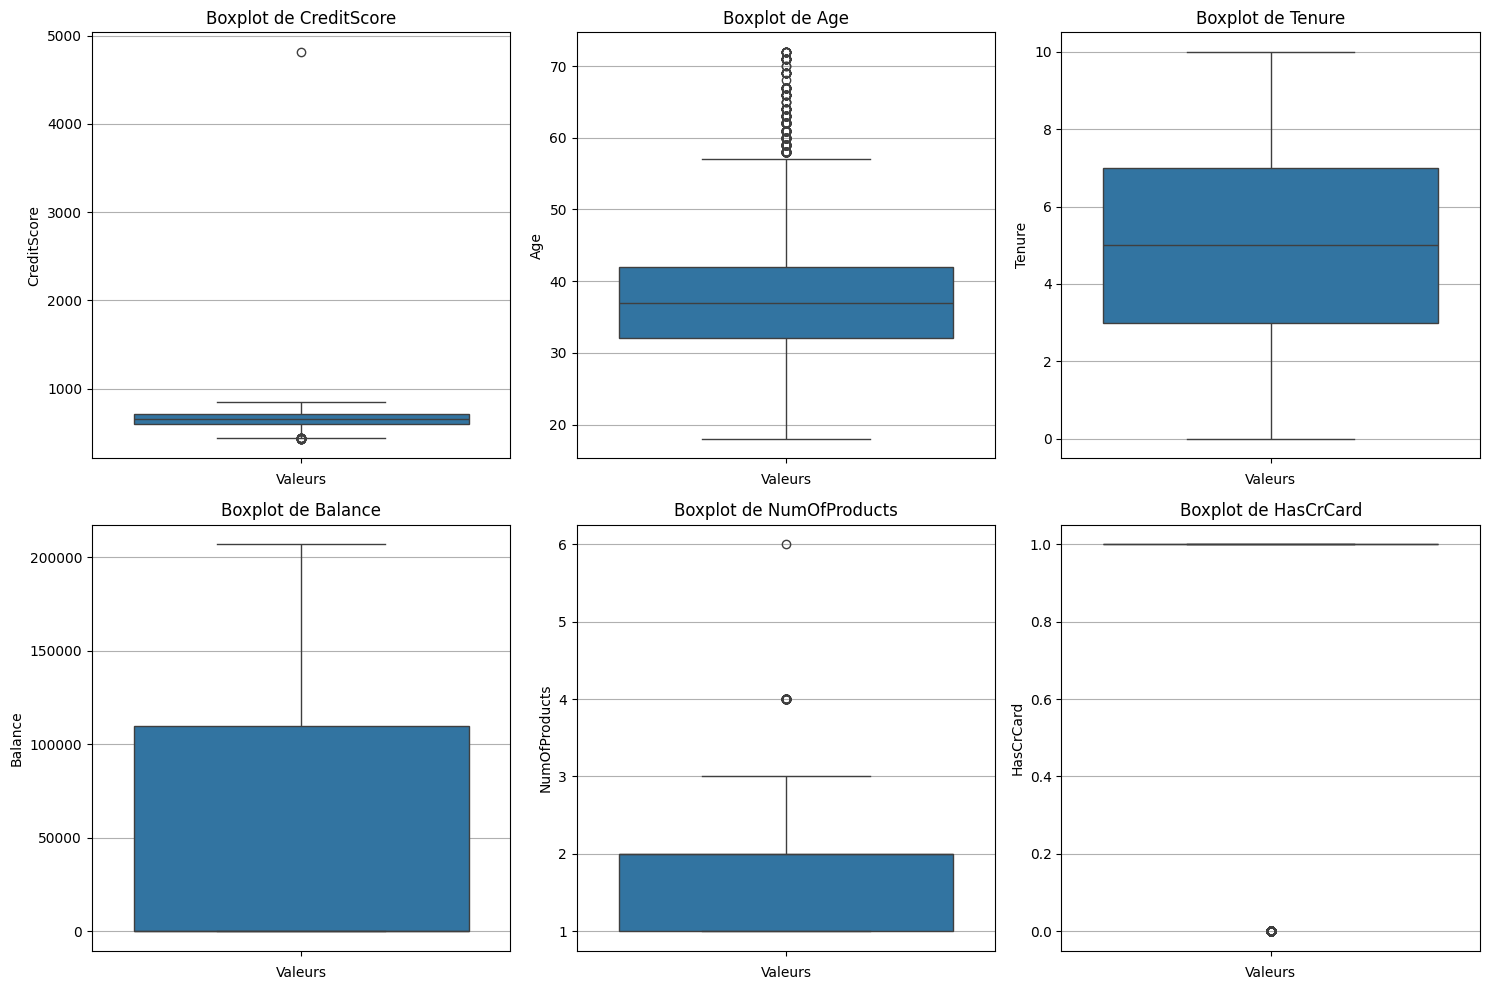

In [25]:
# Boxplot des variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), num_var.columns):
    sns.boxplot(y=df_cleaned[column], ax=ax) 
    ax.set_title(f"Boxplot de {column}")
    ax.set_xlabel("Valeurs")
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [26]:
df_cleaned['Exited'].value_counts()

Exited
0    12010
1     2990
Name: count, dtype: int64

In [27]:
# Fonction pour supprimer les outliers en utilisant l'IQR
def remove_outliers(df, features):
    df_cleaned = df.copy()
    for feature in features:
        Q1 = df_cleaned[feature].quantile(0.25)
        Q3 = df_cleaned[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrer les lignes sans outliers
        df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]
    return df_cleaned

In [35]:
import sys
sys.path.append('../src')
from RemoveOutliers import remove_outliers

ModuleNotFoundError: No module named 'RemoveOutliers'

In [28]:
#df_cleaned = remove_outliers(df_cleaned, num_var.columns)

In [29]:
df_cleaned['Exited'].value_counts()

Exited
0    12010
1     2990
Name: count, dtype: int64

In [30]:
df_cleaned.shape

(15000, 11)

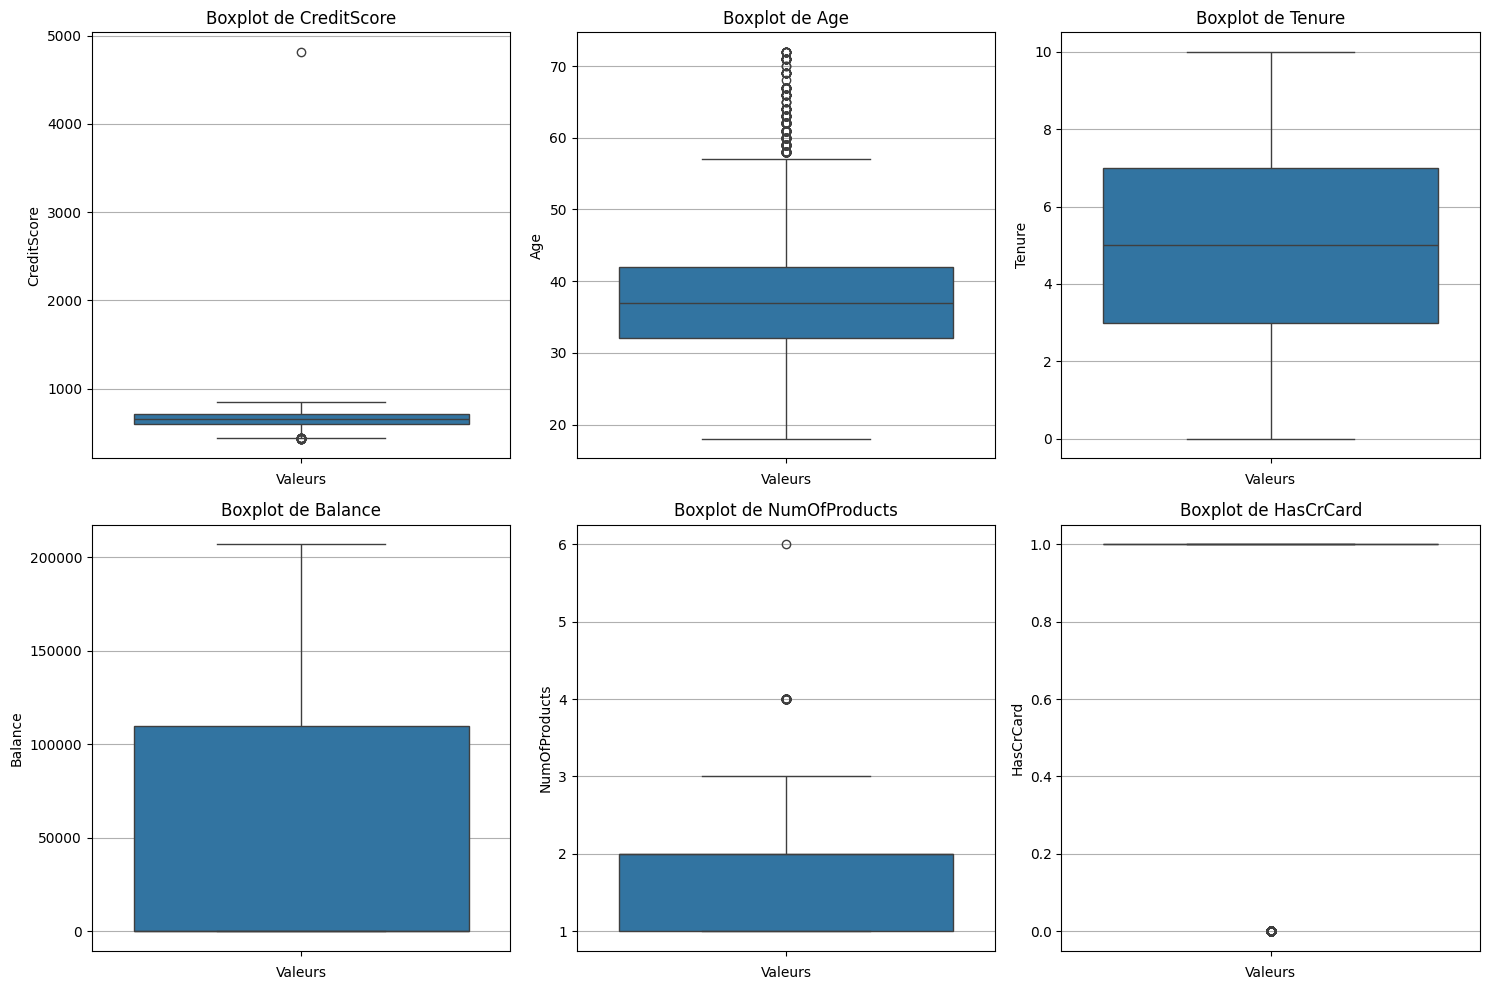

In [31]:
# Boxplot des variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), num_var.columns):
    sns.boxplot(y=df_cleaned[column], ax=ax) 
    ax.set_title(f"Boxplot de {column}")
    ax.set_xlabel("Valeurs")
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [32]:
# 1. Ratio du solde par rapport au salaire estimé
df_cleaned['Ratio_Balance_Salary'] = df_cleaned['Balance'] / df_cleaned['EstimatedSalary']

# 2. Ratio du solde par l'âge
df_cleaned['Ratio_Balance_Age'] = df_cleaned['Balance'] / df_cleaned['Age']

# 3. Ratio du salaire par l'âge
df_cleaned['Ratio_Salary_Age'] = df_cleaned['EstimatedSalary'] / df_cleaned['Age']

# 4. Score d'engagement
df_cleaned['Engagement_Score'] = df_cleaned['IsActiveMember'] + df_cleaned['NumOfProducts'] + df_cleaned['HasCrCard']

# 5. Ratio Produits/Age
df_cleaned['Ratio_Products_Age'] = df_cleaned['NumOfProducts'] / df_cleaned['Age']

# 6. Score de revenu relatif par pays
df_cleaned['Relative_Salary'] = df_cleaned['EstimatedSalary'] / df_cleaned.groupby('Geography')['EstimatedSalary'].transform('mean')

# 7. Ratio Crédit/Age
df_cleaned['Ratio_CreditScore_Age'] = df_cleaned['CreditScore'] / df_cleaned['Age']

# 8. Solde nul avec une carte de crédit
df_cleaned['Zero_Balance_HasCrCard'] = (df_cleaned['Balance'] == 0) & (df_cleaned['HasCrCard'] == 1)

# 9. Client actif avec faible solde
df_cleaned['Low_Balance_Active'] = (df_cleaned['Balance'] < df_cleaned['Balance'].mean()) & (df_cleaned['IsActiveMember'] == 1)

# 10. Possède une carte et est actif
df_cleaned['Active_HasCrCard'] = df_cleaned['IsActiveMember'] * df_cleaned['HasCrCard']

# 11. Logarithme du salaire estimé
df_cleaned['Log_Salary'] = np.log1p(df_cleaned['EstimatedSalary'])



In [33]:
df_cleaned['Exited'].value_counts()

Exited
0    12010
1     2990
Name: count, dtype: int64

In [34]:
df_cleaned.to_csv('../data/preprocessed_data.csv', index=False)